In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C://Users//hp//Documents//MGP//RTA//Dataset//RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [38]:
df["Types_of_Junction"].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [19]:
df.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [12]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

([<matplotlib.patches.Wedge at 0x14ce511c0d0>,
 [Text(-0.9731879149499573, 0.5127429006776738, 'Slight Injury'),
  Text(0.9517381514628155, -0.5515382951800747, 'Serious Injury'),
  Text(1.0991067385120272, -0.044321296883715444, 'Fatal injury')])

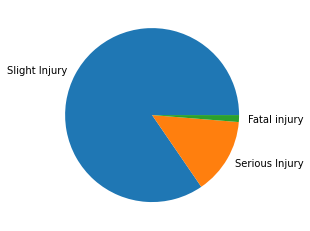

In [13]:
plt.pie(df["Accident_severity"].value_counts(),labels=df["Accident_severity"].unique())

In [3]:
df["Time"]=pd.to_datetime(df["Time"])

In [4]:
df['hour'] = df['Time'].dt.hour
df.drop('Time', axis=1, inplace=True)

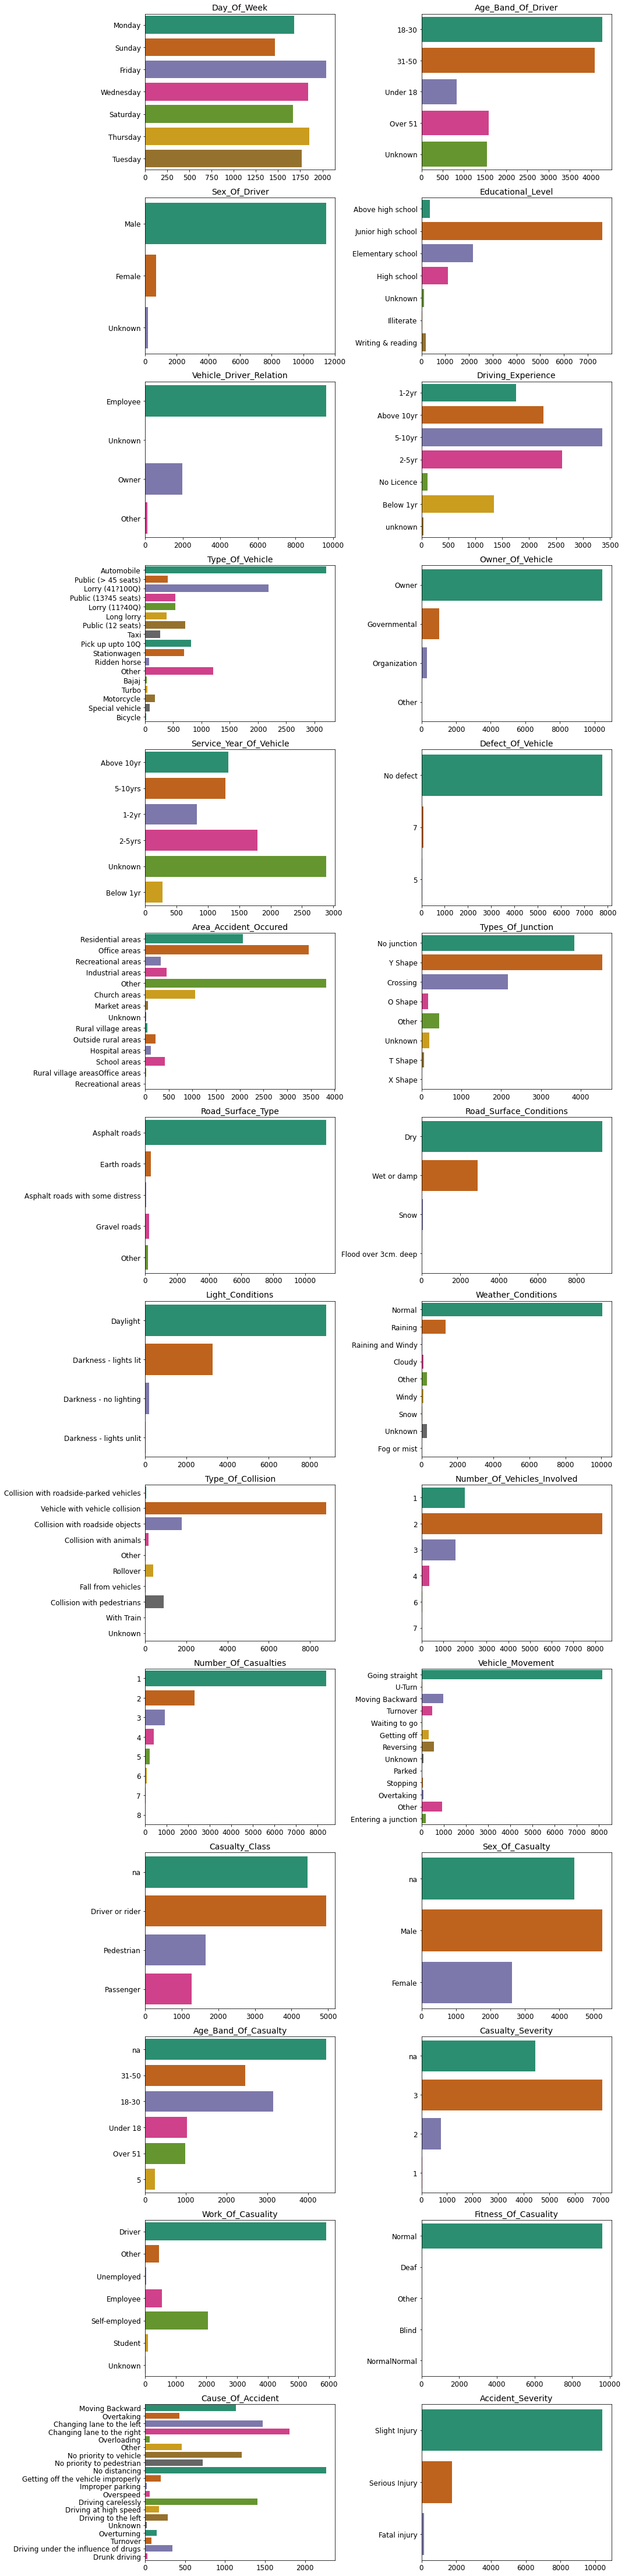

In [16]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

Text(0, 0.5, '')

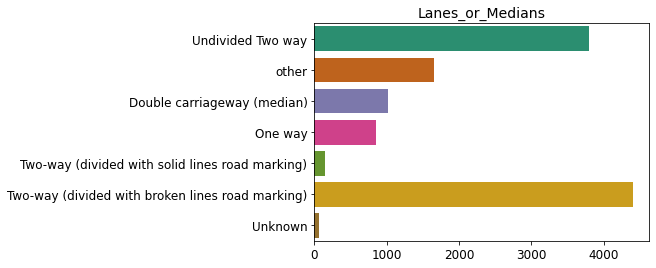

In [35]:
sns.countplot(data=df, y="Lanes_or_Medians", palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Lanes_or_Medians", fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

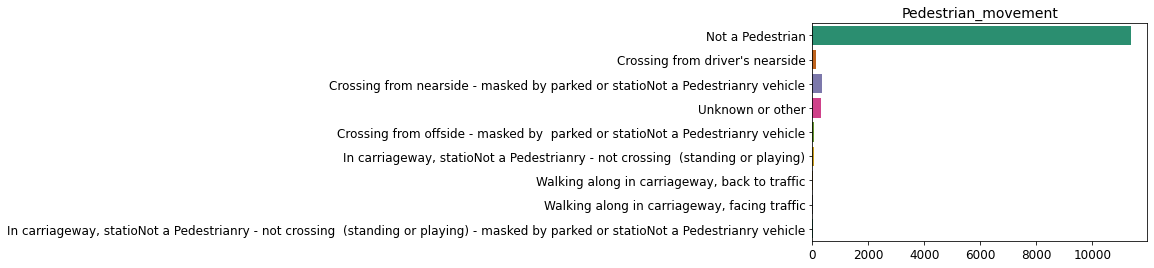

In [36]:
sns.countplot(data=df, y="Pedestrian_movement", palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian_movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

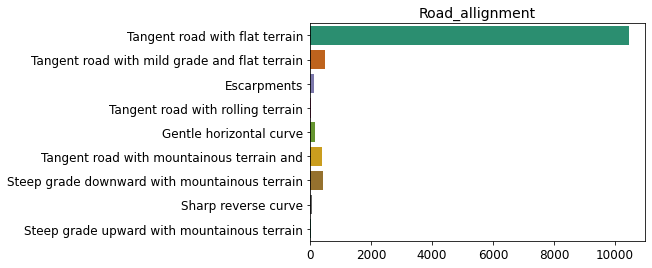

In [39]:
sns.countplot(data=df, y="Road_allignment", palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road_allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

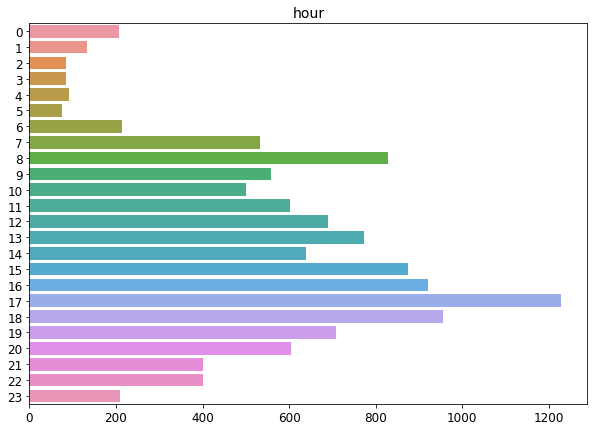

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y="hour")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')

### Observations



In [17]:
df.describe(include=['O']).T

,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


In [18]:
df.isna().sum()[df.isna().sum()!=0]

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

In [5]:
#droping columns with high missing values
df=df.drop(["Service_year_of_vehicle","Defect_of_vehicle","Work_of_casuality","Fitness_of_casuality"],axis=1)

In [6]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour'],
      dtype='object')

In [7]:
X=df.drop("Accident_severity",axis=1)
Y=df["Accident_severity"]

In [7]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder()
train_X=ordinal.fit_transform(train_X)

In [26]:
train_X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [15]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
#train_X=knn.fit_transform(train_X)

In [10]:
train_X=pd.DataFrame(train_X)

In [29]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,4.0,4.0,1.0,1.0,0.0,4.0,10.0,3.0,6.0,0.0,...,2.0,3.0,2.0,3.0,2.0,5.0,3.0,5.0,0.0,17.0
1,4.0,0.0,1.0,4.0,2.0,2.0,0.0,3.0,13.0,6.0,...,2.0,0.0,2.0,0.0,1.0,0.0,2.0,5.0,12.0,19.0
2,0.0,1.0,1.0,2.0,0.0,0.0,9.0,0.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,5.0,3.0,5.0,3.0,20.0
3,5.0,1.0,1.0,4.0,2.0,2.0,0.0,3.0,6.0,6.0,...,1.0,0.0,2.0,1.0,0.0,0.0,2.0,5.0,10.0,13.0
4,4.0,4.0,0.0,3.6,0.0,1.0,0.0,3.0,6.0,6.0,...,0.0,0.0,2.0,0.0,1.0,0.0,2.0,5.0,5.0,15.0


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(train_X,train_y)

RandomForestClassifier(n_estimators=1000)

In [31]:
test_X=ordinal.transform(test_X)
test_X=knn.transform(test_X)

In [113]:
from sklearn.metrics import accuracy_score,f1_score
def score(model):
    prediction=model.predict(test_X)
    print(f1_score(test_y,prediction,average='weighted'))

In [114]:
score(rf)

0.7755120848516189


In [107]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=1000,learning_rate=0.1)
xgb.fit(train_X,train_y)
score(xgb)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8376623376623377


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier(n_estimators=500)
extra.fit(train_X,train_y)

ExtraTreesClassifier(n_estimators=500)

In [115]:
score(extra)

0.7749300921054528


In [17]:
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE()
X_train,Y_train=over_sampling.fit_resample(train_X,train_y)

In [18]:
print(X_train)

             0         1    2         3         4         5          6    7   \
0      4.000000  4.000000  1.0  1.000000  0.000000  4.000000  10.000000  3.0   
1      4.000000  0.000000  1.0  4.000000  2.000000  2.000000   0.000000  3.0   
2      0.000000  1.000000  1.0  2.000000  0.000000  0.000000   9.000000  0.0   
3      5.000000  1.000000  1.0  4.000000  2.000000  2.000000   0.000000  3.0   
4      4.000000  4.000000  0.0  3.600000  0.000000  1.000000   0.000000  3.0   
...         ...       ...  ...       ...       ...       ...        ...  ...   
25048  4.190619  0.190619  1.0  4.000000  0.381238  2.618762   5.323752  3.0   
25049  4.435903  0.782049  1.0  4.000000  0.000000  2.782049   1.089757  0.0   
25050  2.641412  1.452863  1.0  2.358588  0.000000  0.000000   8.437710  3.0   
25051  2.803499  2.803499  1.0  3.868999  0.131001  2.000000   0.262002  3.0   
25052  4.112194  1.887806  1.0  4.000000  0.000000  1.943903   5.112194  3.0   

              8         9   ...        

In [24]:
X_train=pd.DataFrame(X_train)


In [26]:
X_train.columns=X.columns

In [27]:
X_train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,hour
0,4.0,4.0,1.0,1.0,0.0,4.0,10.0,3.0,6.0,0.0,...,2.0,3.0,2.0,3.0,2.0,5.0,3.0,5.0,0.0,17.0
1,4.0,0.0,1.0,4.0,2.0,2.0,0.0,3.0,13.0,6.0,...,2.0,0.0,2.0,0.0,1.0,0.0,2.0,5.0,12.0,19.0
2,0.0,1.0,1.0,2.0,0.0,0.0,9.0,0.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,5.0,3.0,5.0,3.0,20.0
3,5.0,1.0,1.0,4.0,2.0,2.0,0.0,3.0,6.0,6.0,...,1.0,0.0,2.0,1.0,0.0,0.0,2.0,5.0,10.0,13.0
4,4.0,4.0,0.0,3.6,0.0,1.0,0.0,3.0,6.0,6.0,...,0.0,0.0,2.0,0.0,1.0,0.0,2.0,5.0,5.0,15.0


In [85]:
from sklearn.ensemble import ExtraTreesClassifier
extra_over=ExtraTreesClassifier()
extra_over.fit(X_train,Y_train)

ExtraTreesClassifier()

In [88]:
score(extra_over)

0.8425324675324676


In [116]:
rf.fit(X_train,Y_train)
score(rf)

0.7743824365422736


In [94]:
from sklearn.model_selection import KFold,GridSearchCV
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=Y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(500, 1200, 100),
    'ccp_alpha': [0.0, 0.1],
    'max_depth': [5,8,10,12],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)
extree_gs=gsearch.fit(X_train,Y_train)


Fitting 3 folds for each of 112 candidates, totalling 336 fits


In [95]:
print(gsearch.best_params_, gsearch.best_score_)

{'ccp_alpha': 0.0, 'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 800} 0.9267923262041319


In [126]:
extree_tuned=ExtraTreesClassifier(n_estimators=800,max_depth=12,min_samples_split=2,ccp_alpha=0.0)
extree_tuned.fit(X_train,Y_train)
score(extree_tuned)

0.7761500977606487


In [118]:
score(extree_gs)

0.7818152556705179


In [127]:
feat_imp=extree_tuned.feature_importances_

In [128]:
features=zip(X.columns,feat_imp)

In [129]:
feat=pd.DataFrame(features)
feat.columns=["feature","importance"]

In [130]:
feat=feat.sort_values('importance',ascending=False)

<BarContainer object of 27 artists>

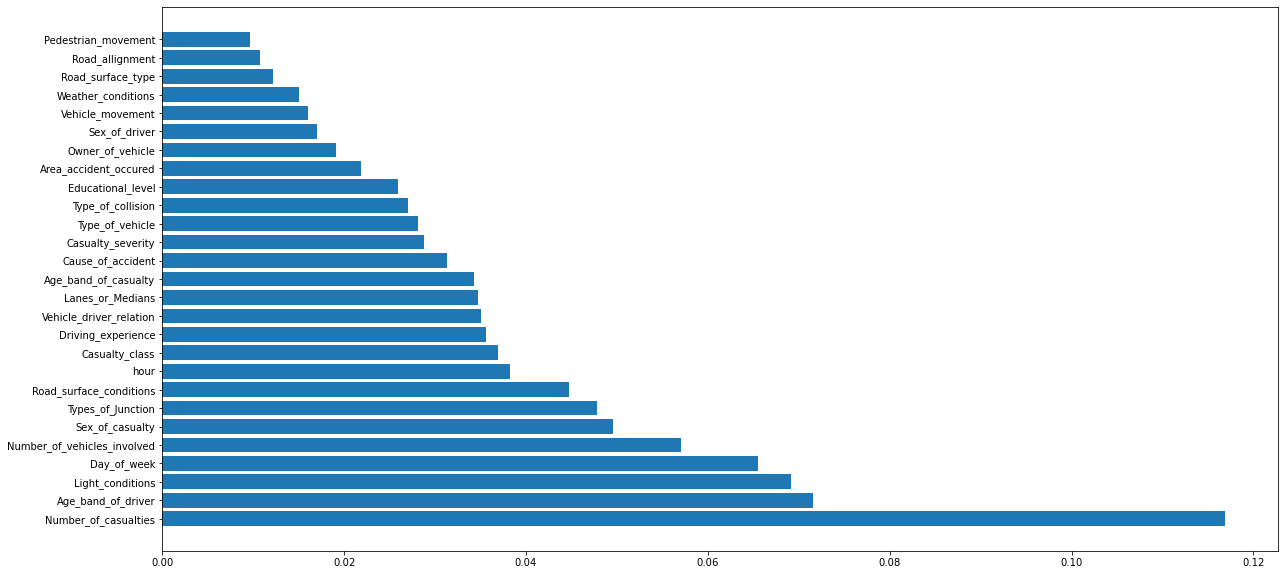

In [131]:
plt.figure(figsize=(20,10))
plt.yticks(fontsize=10)

plt.barh(feat["feature"],feat["importance"])

In [8]:
top_ten=["Number_of_vehicles_involved","Number_of_casualties","hour","Light_conditions","Age_band_of_driver","Day_of_week","Road_surface_conditions","Types_of_Junction","Driving_experience","Sex_of_casualty"]

In [9]:
X.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'hour'],
      dtype='object')

In [10]:
df_ten=pd.DataFrame(X[top_ten],columns=top_ten)

In [11]:
df_ten.head()

,Number_of_vehicles_involved,Number_of_casualties,hour,Light_conditions,Age_band_of_driver,Day_of_week,Road_surface_conditions,Types_of_Junction,Driving_experience,Sex_of_casualty
0,2,2,17,Daylight,18-30,Monday,Dry,No junction,1-2yr,na
1,2,2,17,Daylight,31-50,Monday,Dry,No junction,Above 10yr,na
2,2,2,17,Daylight,18-30,Monday,Dry,No junction,1-2yr,Male
3,2,2,1,Darkness - lights lit,18-30,Sunday,Dry,Y Shape,5-10yr,Female
4,2,2,1,Darkness - lights lit,18-30,Sunday,Dry,Y Shape,2-5yr,na


In [12]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_ten=OrdinalEncoder()
df_ten=ordinal_ten.fit_transform(df_ten)


In [16]:
df_knn=knn.fit_transform(df_ten)

In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_ten,Y_ten=smote.fit_resample(df_knn,Y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extree_ten=ExtraTreesClassifier(n_estimators=400,max_depth=12,min_samples_split=2,ccp_alpha=0.0)
extree_ten.fit(X_ten,Y_ten)

In [41]:
import joblib as jb
jb.dump(extree_ten,'C://Users//hp//Documents//MGP Projects//RTA//Model//model.joblib')

['C://Users//hp//Documents//MGP Projects//RTA//Model//model.joblib']

In [73]:
jb.dump(ordinal,'C://Users//hp//Documents//MGP//RTA//Model//ordinal_encoder.joblib')

['C://Users//hp//Documents//MGP//RTA//Model//ordinal_encoder.joblib']

In [162]:
df["Sex_of_casualty"].unique()

array(['na', 'Male', 'Female'], dtype=object)

In [4]:
import sklearn
print(sklearn.__version__)

1.1.1


In [6]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ordinal=OrdinalEncoder()
ordinal.fit(np.array(["Ayya","ajwd",2,2,3,"Skws"]).reshape(-1,1))

OrdinalEncoder()

In [5]:
import joblib as jb
model=jb.load(r"C:\\Users\\hp\\Documents\\MGP\\RTA\\Model\\model.joblib")

In [62]:
ordinal_t=jb.load(r"C:\\Users\\hp\\Documents\\MGP\\RTA\\Model\\ordinal_encoder.joblib")

In [55]:
df_t=pd.DataFrame(np.array([4,3,17,"Daylight","18-30","Monday","Dry","Y Shape","5-10yr","Male"]).reshape(1,-1),columns=["Number_of_vehicles_involved","Number_of_casualties","hour","Light_conditions","Age_band_of_driver","Day_of_week","Road_surface_conditions","Types_of_Junction","Driving_experience","Sex_of_casualty"])
#df_t=ordinal.transform(df_t)

In [56]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Number_of_vehicles_involved  1 non-null      object
 1   Number_of_casualties         1 non-null      object
 2   hour                         1 non-null      object
 3   Light_conditions             1 non-null      object
 4   Age_band_of_driver           1 non-null      object
 5   Day_of_week                  1 non-null      object
 6   Road_surface_conditions      1 non-null      object
 7   Types_of_Junction            1 non-null      object
 8   Driving_experience           1 non-null      object
 9   Sex_of_casualty              1 non-null      object
dtypes: object(10)
memory usage: 208.0+ bytes


In [57]:
df_t["Number_of_vehicles_involved"]=df_t["Number_of_vehicles_involved"].astype(int)

In [58]:
df_t["Number_of_casualties"]=df_t["Number_of_casualties"].astype(int)

In [59]:
df_t["hour"]=df_t["hour"].astype(int)

In [63]:
df_t=ordinal_t.transform(df_t)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [61]:
model.predict(df_t)

array(['Slight Injury'], dtype=object)